In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
dataset=pd.read_csv(r'C:\\Users\\91912\\Desktop\\TCA PDF\\Mall_Customers (1).csv')
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [29]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [30]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [31]:
dataset.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [32]:
 dataset['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [33]:
annual_income=dataset['Annual Income (k$)']
spending_score=dataset['Spending Score (1-100)']

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

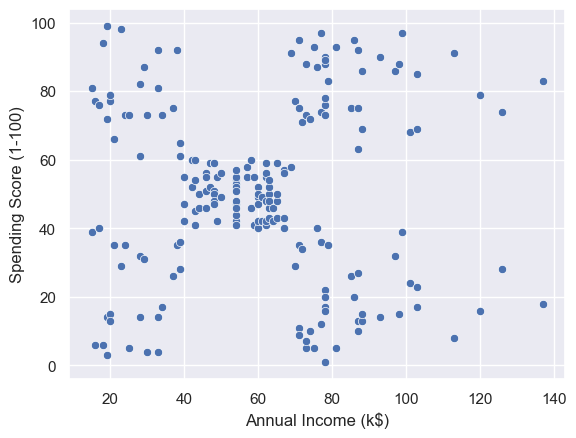

In [34]:
sns.scatterplot(x=annual_income,y=spending_score,data=dataset)

In [35]:
'''
cust_data=dataset[['Annual Income (k$)','Spending Score (1-100)']]
cust_data

'''

"\ncust_data=dataset[['Annual Income (k$)','Spending Score (1-100)']]\ncust_data\n\n"

In [36]:
'''

x=dataset.iloc[:,[3,4]]
x

'''

'\n\nx=dataset.iloc[:,[3,4]]\nx\n\n'

In [37]:

x=dataset.iloc[:,[3,4]].values
x


array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [38]:
from sklearn.cluster import KMeans

wcss=[]

for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',random_state=42)
    km.fit(x)
    wcss.append(km.inertia_)


Text(0.5, 1.0, 'elbow point')

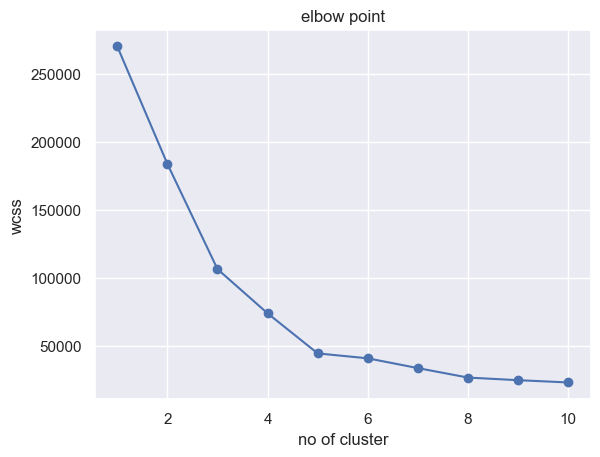

In [39]:
sns.set()
plt.plot(range(1,11),wcss,marker='o')
plt.xlabel('no of cluster')
plt.ylabel('wcss')
plt.title('elbow point')



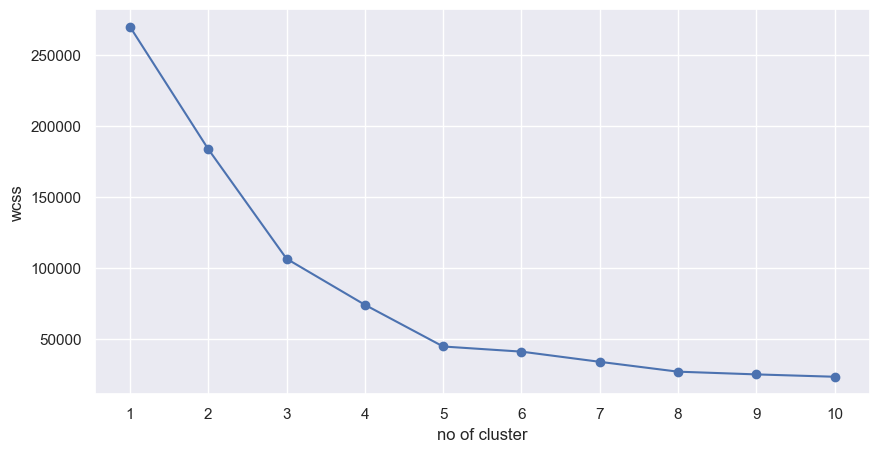

In [40]:
plt.figure(figsize=(10,5))
plt.plot([i for i in range(1,11)],wcss,marker='o')
plt.xlabel('no of cluster')
plt.xticks([i for i in range(1,11)])
plt.ylabel('wcss')
plt.show()

In [41]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y=kmeans.fit_predict(x)
print(y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


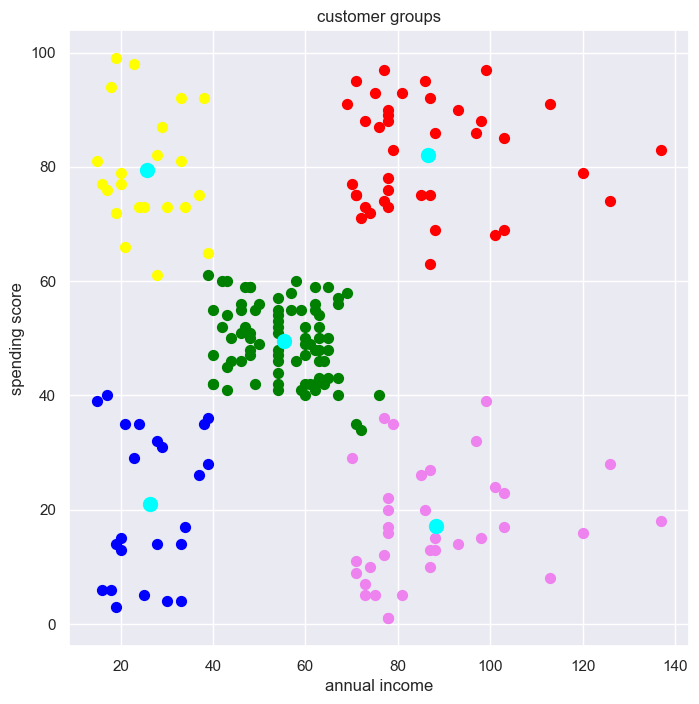

In [45]:
plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0], x[y==0,1], s=50, c='green', label='cluster 1')
plt.scatter(x[y==1,0], x[y==1,1], s=50, c='red', label='cluster 2')
plt.scatter(x[y==2,0], x[y==2,1], s=50, c='yellow', label='cluster 3')
plt.scatter(x[y==3,0], x[y==3,1], s=50, c='violet', label='cluster 4')
plt.scatter(x[y==4,0], x[y==4,1], s=50, c='blue', label='cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='centroids')

plt.title('customer groups')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.show()